# Palmer Penguin Project

***

This notebook contains my analysis of famous palmer penguin’s dataset. This repository focuses on the body mass of the penguin as the main parameter.

![image palmer penguins](https://www.gabemednick.com/post/penguin/featured_hu23a2ff6767279debab043a6c8f0a6157_878472_720x0_resize_lanczos_2.png)

Data is available on [GITHUB](https://allisonhorst.github.io/palmerpenguins/)


## Technical

This section cover all the technical needs to run the code of this repository. It is split in 2 areas:
*   Modules - Pandas, matplotlip and numpy are needed for this project
*   Palmer Penguins Dataset


#### Import modules

In [1]:

# Data frames
import pandas as pd
#Plotting
import matplotlib.pyplot as plt
#numerical arrays
import numpy as np

#### Upload dataset

In [2]:
# Using pd.reader_csv in pythong we can upload the data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Remove NAN is critical step. In future steps like calculation of the correlation we cannot have NAN in the data set. Otherwise it wont get calculated.
df= df.dropna()

#Reference number 1

## Overview 

This section is divided in 3 areas:
*   Quick overview of data calling the function
*   Data sumarry with basic statistics parameters
*   Type of data available in the dataset

In [3]:
# We use funcion name to have a quick look of the Palmer Penguins dataset
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Data Summary


In [5]:
#Summarize the main statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Types

Floats are any number with a decimal point. Almost all platforms represent Python float values as 64-bit “double-precision” values, according to the IEEE 754 standard. Floating point numbers are represented in computer hardware as binary (base-2) fractions. Most decimal fractions cannot be represented exactly as binary fractions, so in most cases the internal representation of a floating-point number is an approximation of the actual value. For example if we divide 1/3 , no matter how many digits you’re willing to write down, the result will never be exactly  but will be an increasingly better approximation of 1/3.

Object/String = The data type for Series and DataFrame columns containing strings is object. IN this case the objects are equivalent to strings. In python strings are a series of characters.


**References for this section can be found in reference under numbers 4,5,6,7**


In [6]:
# This functions allow us to se the type of data which is contained in the dataset. 
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

## Visualization

This section will contain different analysis and graphs that will help to understand the influence of the body mass int the palmer penguin’s colony.

*   First thing we need to create variables and import numbers into NumPy
*   Composition of the colony - represented by a bar, pie and scatter charts
    *   Bar chart named **Number of penguins per specie**. 
    *   Pie chart named **Percentage of penguins per species**. 
    *   Bar and scatter chart named **Average penguin body mass by species**. 

*   Influence of body mass in the colony - histogram and scatter chart





In [7]:
# Creating array using numpy.
 
bill_length = df["bill_length_mm"].to_numpy()
bill_depth = df["bill_depth_mm"].to_numpy()
flipper_length = df["flipper_length_mm"].to_numpy()
body_mass = df["body_mass_g"].to_numpy()


### Composition of the colony

This section aims to analyse the composition of the Palmer Penguins colony based in species and the body weight. The section contains 3 charts.

The first bar chart called **Number of penguins per species** provide a clear view of the composition of the colony by species. The pie chart called **Percentage of penguins per species** shows the percentage of each penguin in the colony.

Finally, the graph called **Average penguin body mass by species** is a combination of a bar and scatter chart. The histogram shows the average body mass per specie. The scatter chart added on top shows the different weights per each of them. As we can see Gentoo penguins are in average the larger penguin in the colony. 



Text(0.5, 1.0, 'Number of Penguins per Specie')

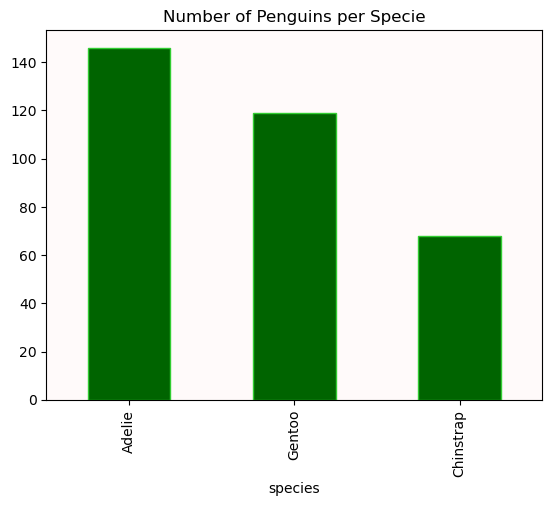

In [8]:
# This bar chart is creating using the parameter species. Species is an object and it cannot be directly used to create the barchart. Adding value count allow the system to create the bar chart.

number_of_penguins =df ["species"].value_counts().plot.bar(color="darkgreen",edgecolor="limegreen")
number_of_penguins.set_facecolor("snow")
plt.title("Number of Penguins per Specie")

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

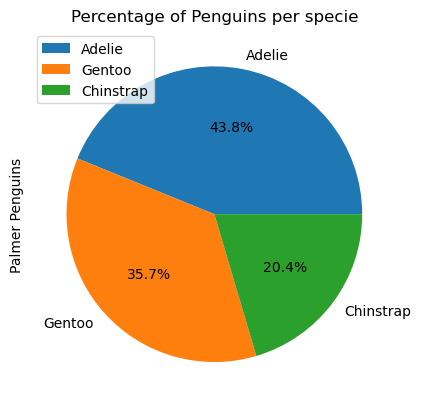

In [9]:
#Adding Value count to species allow to convert species (object) in numbers and that’s allow the matplotlib to create the pie chart

df ["species"].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.ylabel("Palmer Penguins")
plt.title("Percentage of Penguins per specie")

# This function shows the total number of penguins per specie
df ["species"].value_counts()

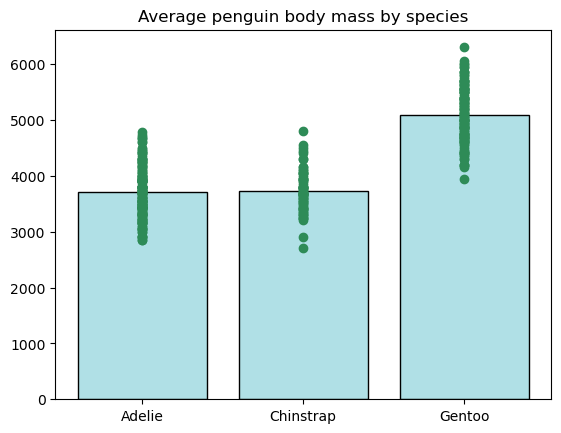

In [10]:
# The bar chart used  2 parameters. Species and body mass. Using groupby we can create groups of penguins and the mean give us teh average body mass.
penguins_grouped = df[['species', 'body_mass_g']].groupby('species').mean().reset_index()

plt.bar(penguins_grouped['species'], penguins_grouped['body_mass_g'], color="powderblue",edgecolor="black")
plt.title('Average penguin body mass by species')

# Adding the scatter plot shows us the range of body mass of each of the species. 
plt.scatter(df ["species"], df[ "body_mass_g"], color = "seagreen")

# Reference 1.

### Influence of body mass in the colony

To Finalize with the body mass analysis in the Palmer Penguin colony we can see 2 more figures. A histogram that shows the number of penguins by body mass and scatter graph that analyses body mass vs flipper length.

In the histogram we can see that the biggest concentration of penguin per body mass are between around 3200 and 4700 grams. This information analysed together with the previous graphs show us that majority of penguins that falls into this area are from Adelie and chinstrap species.

The scatter plot shows a very interesting information. As we can see there is correlation between the size of the flipper length and the body mass. As the body mass increase, the length of the flipper also does.


Text(0.5, 1.0, 'Number of penguis per body mass ')

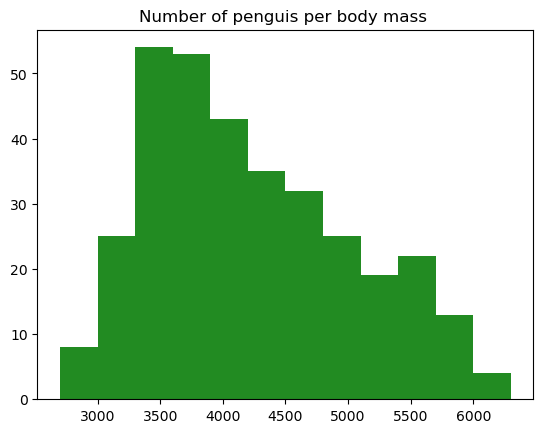

In [11]:
# The histagram shows the number of penguins by body mass. We can see that the majority of penguins falls between apporx 3200 and 4700. 
plt.hist(body_mass, bins= 12, color = "forestgreen")

plt.title("Number of penguis per body mass ")

Text(0.5, 1.0, 'Body mass Vs flipper length')

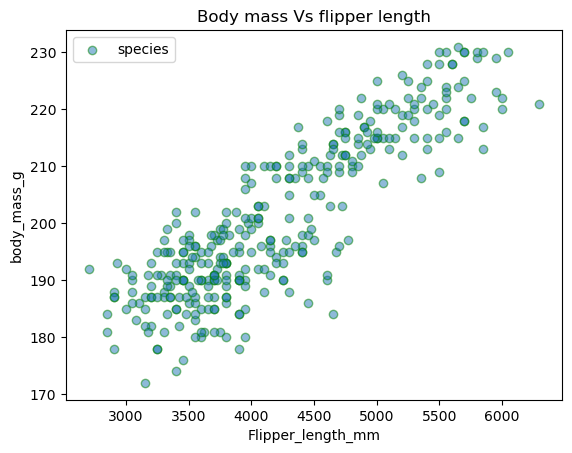

In [12]:
# body mass correlation with flipper length

plt.scatter( body_mass, flipper_length, alpha=0.5, edgecolors='g', linewidths=1)
plt.legend(["species"])

plt.xlabel("Flipper_length_mm")
plt.ylabel("body_mass_g")
plt.title("Body mass Vs flipper length")



# References 2, 3

### Final project, Best fit lane and correlation

In [13]:

m, c = np.polyfit(body_mass,flipper_length,1)
m,c

(0.01519526481521767, 137.0396208922547)

Text(0, 0.5, 'Flipper Length mm')

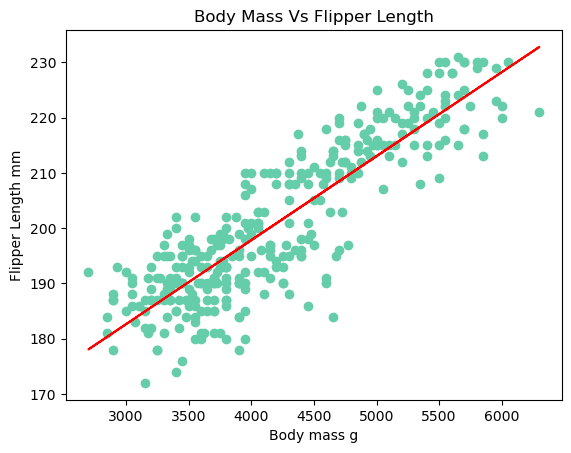

In [30]:
#Create a new figure and set of axes
fig, ax = plt.subplots()

#Siple plot
ax.plot(body_mass,flipper_length,"o", color = "mediumaquamarine")

#Siple plot
ax.plot(body_mass, m * body_mass + c,"r-")


ax.set_title("Body Mass Vs Flipper Length")

ax.set_xlabel("Body mass g")

ax.set_ylabel("Flipper Length mm")


In [31]:
# Measure the correlation, strong correlation
np.corrcoef(body_mass,flipper_length)

# Reference 9


array([[1.       , 0.8729789],
       [0.8729789, 1.       ]])

## References
1. https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
2. www.datacamp.com / https://www.datacamp.com/tutorial/types-of-data-plots-and-how-to-create-them-in-python
3. https://www.w3schools.com/python/
4. https://stackoverflow.com/
5. https://note.nkmk.me/en/python-pandas-dtype-astype/#:~:text=The%20object%20type%20is%20a,elements%20need%20to%20be%20strings.
6. https://docs.python.org/3.6/tutorial/floatingpoint.html
7. https://realpython.com/python-data-types/
8. Python crash curse 3 edition by Eric Matthews 2023
9. https://www.statology.org/what-is-a-strong-correlation/

***

### END